<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Stastical/krieg_regression_example_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import unittest
import numpy as np
import GPy

from sklearn.metrics import r2_score # metrics to evaluate the model r2_score
from sklearn.metrics import mean_absolute_error # metrics to evaluate the model mean absolute error
from sklearn.metrics import mean_squared_error # metrics to evaluate the model mean squared error
# details of metric equations https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 

In [3]:
# web page of this code (it was adpted from here, please check example 10)
# https://programtalk.com/python-examples/GPy.models.GPRegression/

In [4]:
xmin, xmax = 1, 2.5*np.pi
b, C, SRN  = 1, 0 , 1
X = np.linspace(xmin, xmax, 500)
y  = b*X + C + SRN*np.sin(X)
y += 0.05*np.random.randn(len(X))
X, y = X[:, None], y[:, None]
m = GPy.models.GPRegression(X, y)
lognormal = GPy.priors.LogGaussian(1, 2) 
#  GPy.priors.LogGaussian(mean, standard deviation) the univariate log-Gaussian probability function, coupled with random variables 
#  for more details please check GPy Documentation, Release page 16: https://buildmedia.readthedocs.org/media/pdf/gpy/stable/gpy.pdf
m.rbf.set_prior(lognormal)
#  set_prior(prior, warning=True)
#  Set the prior for this object to prior. :param Prior prior: a prior to set for this parameter :param bool
#  warning: whether to warn if another prior was set for this parameter
m.randomize()
# randomize the parameters of the model (page 11 GPy documentation)
# it is better work using a randomize but the code work if this line is commented.

reconstraining parameters GP_regression.rbf


In [5]:
m.checkgrad()
# it is for checking that the gradients of a given kernel are implemented correctly.
# the code work without this line -for more details please check page 107 GPy documentation

In [6]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,11.904648377582575,+ve,"lnN(1, 2)"
rbf.lengthscale,2.1722381545883622,+ve,"lnN(1, 2)"
Gaussian_noise.variance,1.0552756674370685,+ve,


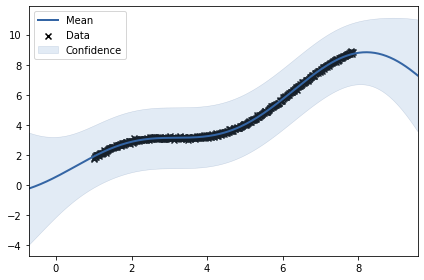

In [7]:
fig = m.plot()


In [8]:
# obtaining the value of y_pred (y_mean) and standard deviation (y_std) for each point
y_mean, y_std = m.predict(X.reshape(-1, 1))

In [9]:
# writing the metrics:
print('r^2 score =',r2_score(y, y_mean))
print('MAE =',mean_absolute_error(y, y_mean))
print('MSQE =',mean_squared_error(y, y_mean))

r^2 score = 0.9991850551325266
MAE = 0.04417805301108684
MSQE = 0.003231092770557679
